### Veri mi Model mi?
Veri daha önemlidir. Düzgün ayarlanmamış ve temiz olmayan bir veriden üretilen Makine Öğrenmesi <br>
Bozuk bir saat gibidir. <br>
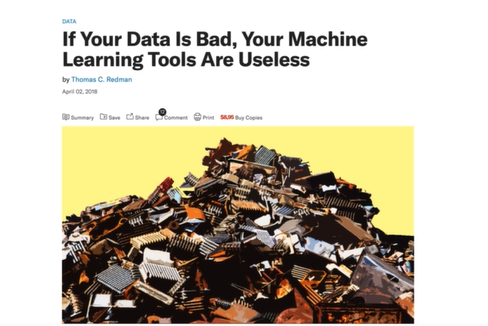

## Veri Ön İşleme'ye Genel Bakış

***Veri Temizleme (Data Cleaning / Cleasing)***
* Gürültülü Veri (Noisy Data) <br>
    verinin hikayesinde baktığımızda mantıksız veya anlamsız duran verilerdir. <br>
        * kişiler ve özellikleri tablosunda erkeğin hamile durumu verisi
        * malzemeler ve fiyatları tablosunda bebek bezinin 1m TL olması 
* Eksik Veri Analizi (Missing Data Analysis)
* Aykırı Gözlem Analizi (Outlier Analysis) <br>
    diğer verilere göre ***çok düşük*** veya ***çok yüksek*** duran verilerdir (***uyuşmayan***)

***Veri Standardizasyonu (Data Standardization, Feature Scaling)***
* 0-1 Dönüşümü (Normalization)
* z-skoruna Dönüştürme (Standardization)
* Logaritmik Dönüşüm (Log Transformation)

***Veri Indirgeme (Data Reduction)***
* Gözlem (Observation) Sayısının Azaltılması
* Değişken (Variable) Sayısının Azaltılması

***Değişken Dönüşümleri (Variable Transformation)***
* Sürekli değişkenlerde dönüşümler
* Kategorik değişkenlerde dönüşümler

### Aykırı Gözlem
Veride genel eğilimin oldukça dışına çıkan ya da diğer <br>
gözlemlerden oldukça farklı olan gözlemlere aykırı gözlem denir.

#### Aykırı Değer
Aykırılığı ifade eden nümerik değere ***aykırı değer*** denir

#### Aykırı Gözlem (Edited)
Aykırı değeri barındıran gözlem birimine ***aykırı gözlem*** denir

### Aykırı Değer Neye Sebep Olur?
***Genellenebilirlik*** kaygısı ile oluşturulan ***kural setlerini*** ya
da ***fonksiyonları*** yanıltır. ***Yanlılığa*** sebep olur.

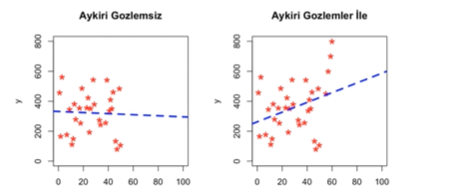 <br>

birkaç aykırı gözlem ***verinin geneli*** hakkında bilgi sahibi olmamızı sağlayan bir doğrunun ***eğimini değiştirmiş***

### Neye Göre Kime Göre Aykırı Gözlem?
***Veride genel eğitimin oldukça dışına çıkan gözlemler***.<br>
Peki veri setinin genel eğiliminin dışına çıkmayı nasıl tanımlarız?<br>

***1. Sektör Bilgisi*** <br>
Örneğin bir ev fiyat tahmin modelinde ***1000 metrekarelik evleri*** modellemeye almamak.<br>

Eğer kurulan modelin bir genelleme kaygısı <br>
varsa; zaten çok seyrek olan senoryalar ve genele <br>
uymayan yapılar çalışmanın dışında bırakılmalıdır. <br>


***2. Standart Sapma Yaklaşımı*** <br>
Bir değişkenin ortalamasının üzerine aynı değişkenin ***standart sapması*** hesaplanarak ***eklenir***. ***1,2 ya da 3 standart sapma***<br>
değeri ortalama üzerine eklenerek ortaya çıkan bu değer ***eşik değer*** olarak düşünülür ve bu değerden ***yukarıda*** ya da<br>
***aşağıda*** olan değerler ***aykırı değer*** olarak tanımlanır.<br>
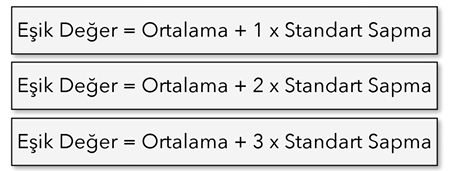 <br>

***Örn***<br>
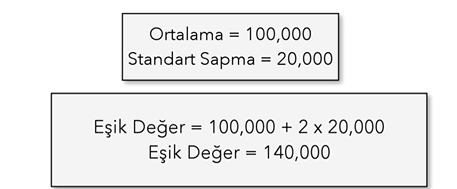 <br>

***3. Z-Skoru Yaklaşımı*** <br>
***Standart sapma*** yöntemine ***benzer*** şekilde çalışır. Değişken ***standart normal dağılıma*** uyarlanır, yani standartlaştırılır. <br>
Sonrasında -örneğin- dağılımın sağından ve solundan ***-+ 2.5*** değerine göre bir ***eşik değer konulur*** ve bu değerin ***üzerinde*** ya <br>
da ***altında*** olan değerler ***aykırı değer*** olarak işaretlenir. <br>

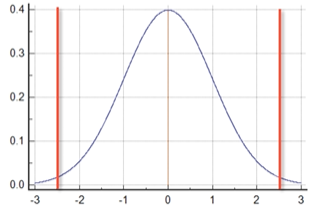 <br>

***4. Boxplot (interquartile range - IQR) Yöntemi*** <br>
***En sık kullanılan*** yöntemlerden birisidir. Değişkenin değerleri ***küçükten büyüğe sıralanır***. ***Çeyrekliklerine*** (yüzdekliklerine) yani <br>
***Q1,Q3*** degerlerine karşılık gelen değerler uzerinden bir ***eşik deger*** hesaplanır ve bu eşik degere gore aykırı deger tanımı yapılır<br>

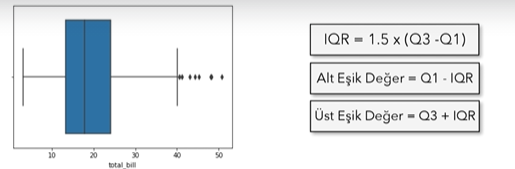

### Genellikle 1 ve 4 

## Aykırı Gözlem Analizi
### Aykırı Değerleri Yakalamak

In [3]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64','int64']) # aykırı gözlem sadece numerikte görüldüğünden
df = df.dropna() # NA değerlerini düşür.
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df_table = df.table

In [5]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

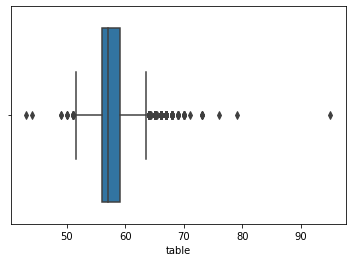

In [8]:
sns.boxplot(x=df_table);# kutu grafikteki elmas noktaları aykırı değerdir.

### Eşik Değer Belirleme 

In [9]:
Q1 = df_table.quantile(0.25)
Q1

56.0

In [10]:
Q3 = df_table.quantile(0.75)
Q3

59.0

In [12]:
IQR = (Q3 - Q1)
IQR # inter quertile

3.0

In [14]:
lower_bound = Q1 - 1.5 * IQR
lower_bound # alt sınır

51.5

In [16]:
upper_bound = Q3 + 1.5 * IQR
upper_bound # üst sınır

63.5

In [23]:
aykırı_tf = (df_table < lower_bound) | (df_table > upper_bound) #aykırı değer true - false grubu

In [25]:
df_table[aykırı_tf] # fancy ile aykırı değerler

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [28]:
df_table[aykırı_tf].index # indexleri

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

### Aykırı Değer Problemini Çözmek
* ***Silme***
* ***Ortalama ile Doldurma***
* ***Basklılama***

### Silme

In [29]:
import pandas as pd

In [32]:
type(df_table) # şuanki hali series, dataframe olması lazım.

pandas.core.series.Series

In [34]:
df_table = pd.DataFrame(df_table)

In [35]:
df_table.head()

,table
0,55.0
1,61.0
2,65.0
3,58.0
4,58.0


In [37]:
df_table.shape

(53940, 1)

In [40]:
clean_df = df_table[~((df_table < lower_bound) |  (df_table > upper_bound)).any(axis=1)] 

# '~' (tilda) işareti verilen koşulun dışındakileri anlamını taşır. 
# bizim koşullarımız aykırıları söylediğinden, tilda koyulduğunda aykırı olmayanlar gelecektir.
# any kullanma sebebimiz ise axis belirtebilmek içindir.

In [41]:
clean_df.head()

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0


In [43]:
clean_df.shape # 605 adet aykırı gözlem gitti

(53335, 1)

### Ortalama İle Doldurma
bu sefer aykırı gözlemleri ortalama ile dolduracağız.

In [44]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64','int64']) # aykırı gözlem sadece numerikte görüldüğünden
df = df.dropna() # NA değerlerini düşür.
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [45]:
df_table = df.table

In [46]:
aykırı_tf.head()

0    False
1    False
2     True
3    False
4    False
Name: table, dtype: bool

In [47]:
df_table[aykırı_tf]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [48]:
df_table.mean()

57.45718390804598

In [51]:
df_table[aykırı_tf] = df_table.mean()

<ipython-input-51-e6a64b0f6582>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykırı_tf] = df_table.mean();


In [50]:
df_table[aykırı_tf]

2        57.457184
91       57.457184
145      57.457184
219      57.457184
227      57.457184
           ...    
53695    57.457184
53697    57.457184
53756    57.457184
53757    57.457184
53785    57.457184
Name: table, Length: 605, dtype: float64

### Baskılama Yöntemi
***Ortalama ile doldurma*** yöntemine ***alternatif*** olarak düşünülmüştür. Ortalaması 50 olan bir verisetinde 100 değerine sahip verinin  <br>
değerini 50 ye düşürmektense eşik değerlere bağlanması durumudur.

***Amaç*** <br>
Aykırı değerleri ***eşik değerler*** ile doldurma

In [55]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64','int64']) # aykırı gözlem sadece numerikte görüldüğünden
df = df.dropna() # NA değerlerini düşür.
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [56]:
df_table = df.table

In [57]:
df_table[aykırı_tf]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [58]:
df_table[(df_table < lower_bound)] = lower_bound # alt aykırı değerleri, alt sınır ile doldurma

<ipython-input-58-eaed5c7f7cca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[(df_table < lower_bound)] = lower_bound # alt aykırı değerleri, alt sınır ile doldurma


In [60]:
df_table[(df_table > upper_bound)] = upper_bound # üst aykırı değerleri, üst sınır ile doldurma

<ipython-input-60-f43e8ae2eb6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[(df_table > upper_bound)] = upper_bound # üst aykırı değerleri, üst sınır ile doldurma


In [61]:
df_table[aykırı_tf]

2        63.5
91       63.5
145      63.5
219      63.5
227      63.5
         ... 
53695    63.5
53697    63.5
53756    63.5
53757    63.5
53785    63.5
Name: table, Length: 605, dtype: float64

## Çok Değişkenli Aykırı Gözlem Analizi
### Örnek
***yaş-evlilik sayısı*** veri setimiz olsun. bu veri setinde yaşlar ***17-80*** arasında gidebilir ve bizim için aykırı bir gözlem oluşturmaz.<br>
Evlilik sayıları da aynı şekil ***1-5*** gidebilir bu da aykırılık oluşturmaz. Fakat ***17 yaş 3 evlilik durumu*** gibi ***uç bir gözlem*** var ise bu bir ***aykırı durumdur***. <br>
Anlaşılacağı üzere 2 farklı değişken üzerinden bağlam kurularak aykırı gözlem oluşabilir. <br>
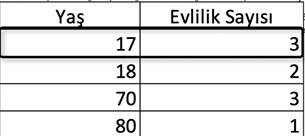


### Local Outlier Factor

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

### Çalışma Mantığı
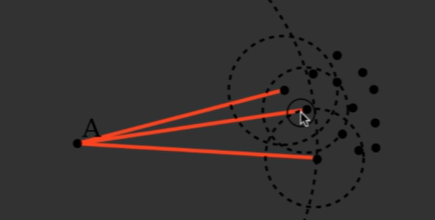 <br>
her bir noktanın en yakın 3 komşusunu kapsayacak bir daire çizildiğinde yarıçapları bir score olarak tutuluyor. <br>
bu score'lar aynı eşik değer mantığı uygulanarak aykırı gözlemler yakalanıyor.

In [64]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.select_dtypes(include = ['float64', 'int64']) 
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [65]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [66]:
clf = LocalOutlierFactor(n_neighbors=20,contamination=0.1) # algoritmayı instance ettik
# n_neighbors => kaç komşu üzerinden oluşturlacak (daire)
# contamination => yoğunluk

In [67]:
clf.fit_predict(df) # predict yapılacak dataframe'i verdik.

array([-1, -1, -1, ...,  1,  1,  1])

In [71]:
df_scores = clf.negative_outlier_factor_ # scoreları aldık. Bu scorelar bütün numerik değişkenler için var

### Sıçramayı Grafik Üzerinden Görmek

<AxesSubplot:>

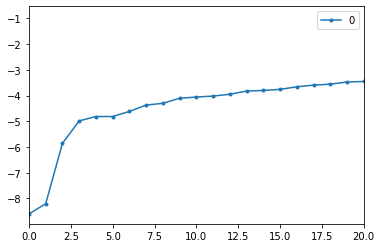

In [121]:
pd.DataFrame(np.sort(df_scores)).plot(stacked=True, xlim=[0,20], style='.-')

sıçrama 3. noktada olmuş fakat biz rastegele 13. nokta diye alalım.

In [88]:
df_scores[:10] # score'ların ilk 10 örneği

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [92]:
np.sort(df_scores)[:20] # k-b => ilk 20 örnek

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

burada eşik belirleme işini önceden planlamış ve yapmış gibi yaptık. Ve sonuç olarak sıralanmış <br>
halde 13. gözlemi eşik olarak ele aldık. 

In [76]:
# k-b doğru 13. değeri eşik değeri varsayalım ve bu değer altındaki değerleri çıkaralım.

In [93]:
threshold = np.sort(df_scores)[13] # eşik değerimiz
threshold

-3.823787967755565

In [91]:
aykırı_tf = df_scores < threshold 

In [99]:
# aykırı değerler
df[aykırı_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


## Çok Değişkenli Aykırı Yöntem Giderme

### Silme

In [100]:
yeni_df = df[~aykırı_tf]

In [101]:
yeni_df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


### Baskılama
Ortalama ile doldurmaktan çok eşik değerdeki gözlemi aykırı gözlemlere doldurmak daha mantıklı <br>

In [109]:
threshold_value = df[df_scores == threshold] # eşik değerimiz

In [114]:
aykırı_array = df[aykırı_tf].to_records(index=False) # dataframe => array
aykırı_array

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [115]:
aykırı_array[:] = threshold_value.to_records(index=False) # tüm array row'ları aynı değer yaptık.
aykırı_array

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [117]:
df[aykırı_tf] = pd.DataFrame(aykırı_array , index=df[aykırı_tf].index) # array'daki değerleri dataframe'e kaydetttik.

In [118]:
df[aykırı_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19
49189,0.45,68.6,57.0,756,4.73,4.5,3.19


## Eksik Veri Nedir?

İncelenen veri setindeki gözlemlerde eksiklik olması durumunu ifade etmektedir. <br>
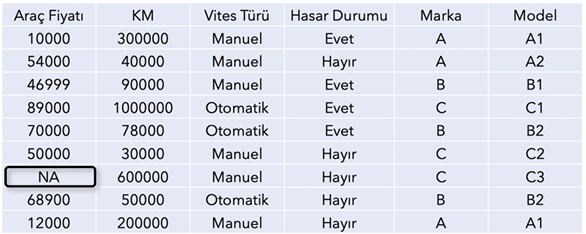  <br>
***Ne Yapabiliriz?*** <br>
* Gözlemi direkt silebiliriz (satırı)
* Farklı şekillerde doldurup gözlemi geri kazanabiliriz

***Silersek Ne Olur?*** <br>
* Eksik değere sahip gözlemlerin veri setinden direk <br>
  çıkarılması ve hastalığı'nın incelenmemesi yapılacak <br>
  istatistiksel çıkarımların, modelleme çalışmalarının <br>
  güvenilirliğini düşürecektir. (Alpar, 2011) <br>

* Eksik gözlemlerin veri setinden direk çıkarılabilmesi için veri setindeki <br>
    eksikliğin bazı durumlarda kısmen bazı durumlarda tamamen rastlantısal olarak <br>
    oluşmuş olması gerekmektedir. Eğer eksiklikler değişkenler ile ilişkili olarak <br>
    ortaya çıkan yapısal problemler ile meydana gelmiş ise bu durumda yapılacak <br>
    silme işlemleri ciddi yanlılıklara sebep olabilecektir.<br>
    (Tabachnick ve Fidell, 1996)<br>

***Özetle Veri Setindeki eksikliklerin rastsal olduğu sürece silebiliriz. Aksi taktirde ciddi yanlılıklara sebep olacaktır*** <br>



### Eksik Veriyi Silmenin Zararları
* Veri setindeki eksikliğin ***yapısal bir eksilik*** olup olmadığının bilinmesi gerekir! <br>
  ***Kredi kartı kayıtlı olmayan*** bir kullanıcının, kredi kartı harcaması değeri ***NA olabilir***. Çünkü bir değişken diğerinin bir değerine bağlı <br><br>
  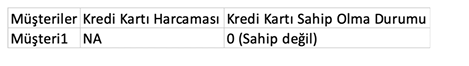 <br>
* NA her zaman ***eksiklik anlamına gelmez*** <br>
  ***kredi kartı kayıtlı*** olan bir kullanıcı olsun. Bu kullanıcı belki ***hiç alışveriş yapmadığından*** bu değer ***NA*** olmuş olabilir. <br>
  ***Bu değer 0 ile doldurulabilir*** <br><br>
  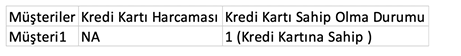
  
* Bilgi Kaybı <br>
  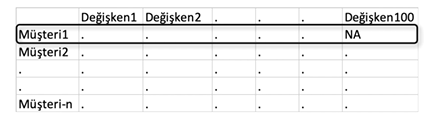

## Eksiklik Türleri Nelerdir?
* ***Tümüyle Raslantısal Kayıp:*** <br>Diğer değişkenlerden ya da yapısal bir problemden 
  kaynaklanmayan tamamen rastgele oluşan gözlemler. <br>
  Kolayca ***ortalama, sıfırlama*** gibi ***doldurma*** işlemleri yapılabilir.

* ***Raslantısal Kayıp:*** <br>Diğer değişkenlere bağlı olarak oluşabilen eksiklik türü. <br>

* ***Raslantısal Olmayan Kayıp:*** <br>Göz ardı edilemeyecek olan ve yapısal problemler ile
  ortaya çıkan eksiklik türü.

## Eksik Verinin Sebebini Analiz Etmek 
* ***Görsel Teknikler*** ✅
* ***Bağımsız iki Örneklem T Testi***
* ***Korelasyon Testi***
* ***Little'nin MCAR Testi*** ✅

## Eksik Veriyi Giderme Yöntemleri
### Silme Yöntemleri
* Gözlem ya da değişken silme yöntemi
* Liste bazında silme yöntemi (Listwise Method)
* Çiftler bazında silme yöntemi (Pairwise Method)
### Değer Atama Yöntemleri
* Ortanca, ortalama, medyan
* En Benzer Birime Atama (hot deck)
* Dış Kaynaklı Atama
### Tahmine Dayalı Yöntemler
* Makine Öğrenmesi
* Çoklu Atama Yöntemi
* EM

## Eksik Veri Analizi

### Hızlı Çözüm
bundan sonra daha geniş yönleriyle alacağımızdan. Kolayca işim hallolsun durumlarından. Bu işin en sade yolunu görelim.

In [55]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Eksik Değerlerin Saptanması

In [56]:
#değişkenlerdeki tam değer sayısı
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [57]:
#değişkenlerdeki eksik değer sayısı
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [58]:
#veri setindeki toplam eksik değer sayısı
df.isnull().sum().sum()

7

In [59]:
#en az bir eksik değere sahip gözlemler
df[df.isnull().any(axis=1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [60]:
#tüm değerleri tam olan gözlemler
df[df.notnull().all(axis=1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Eksik Değerlerin Direkt Silinmesi

In [61]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [29]:
df.dropna(inplace=True) # inplace kullan 

In [30]:
df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Basit Değer Atama

In [32]:
df.V1

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: V1, dtype: float64

In [38]:
avg = df.V1.mean() # ortalama ile atama

In [39]:
df.V1.fillna(avg)

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [40]:
df.V2.fillna(0)

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

### Tüm Sütunlardaki verilere ortalama atama - apply 

In [52]:
df = df.apply(lambda x : x.fillna(x.mean()) , axis=0) # axis = 0 vermemizin sebebi satırlara odaklanıp sütunların-satırlarına göre ilerlemesi

In [54]:
df

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


## Eksik Veri Yapılarının Görselleştirmesi

In [63]:
import missingno as msno

### Bar
* Sol taraf doluluk oranını belirten bir indikator.
* Sağ taraf adet belirten bir indikator.
* Üst taraftaki sayılar kaç adet dolu olduğunu gösterir.
* Sütunlar Değişkenleri temsil eder.

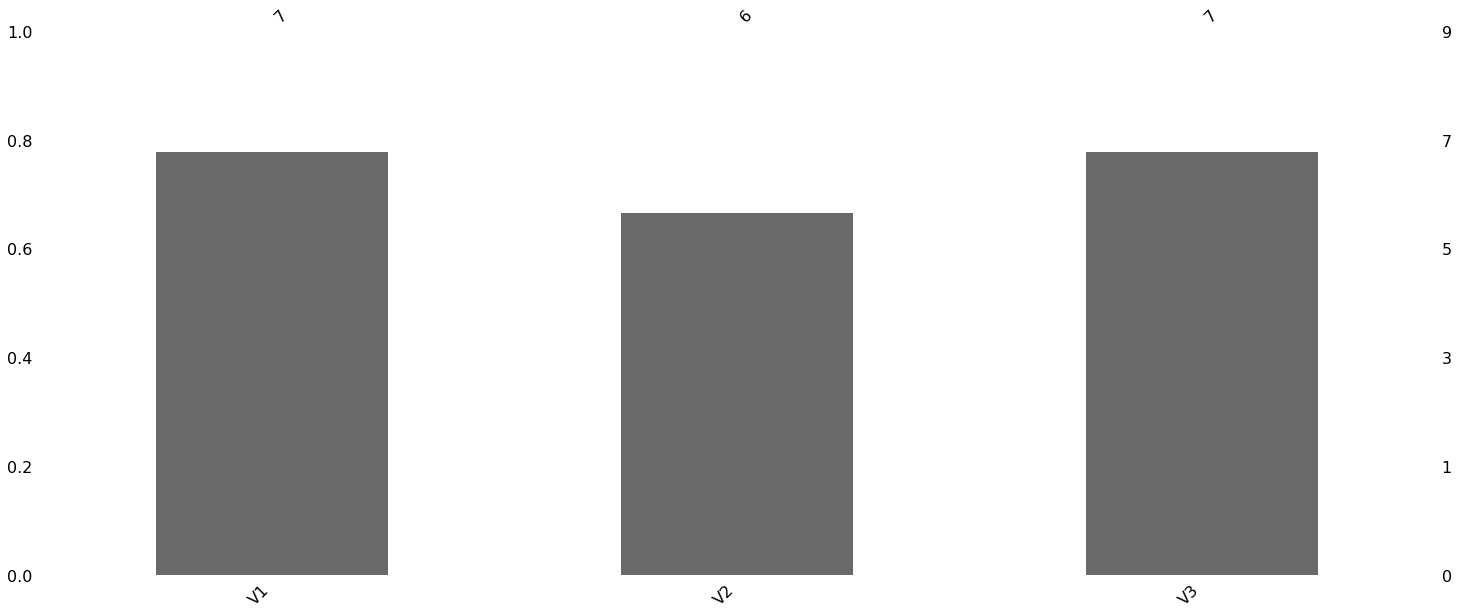

In [65]:
# değişkenlerdeki eksikliği gösteren bar
msno.bar(df);

### Matrix
* matrix fonksiyonunun çıktısı siyah beyaz tablo şeklinde betimlenebilir. 
* ***Siyah bölgeler dolu***, ***beyaz bölgeler boş*** değerleri gösterir. <br>
* ***Sol*** taraftaki 1-9 ***row-dilimlerini*** gösterir. 
* ***Sağ*** taraftaki doğrusal grafik ***boş-dolu doğrusal grafiğidir***.
* Sütunlar değişkenleri gösterir

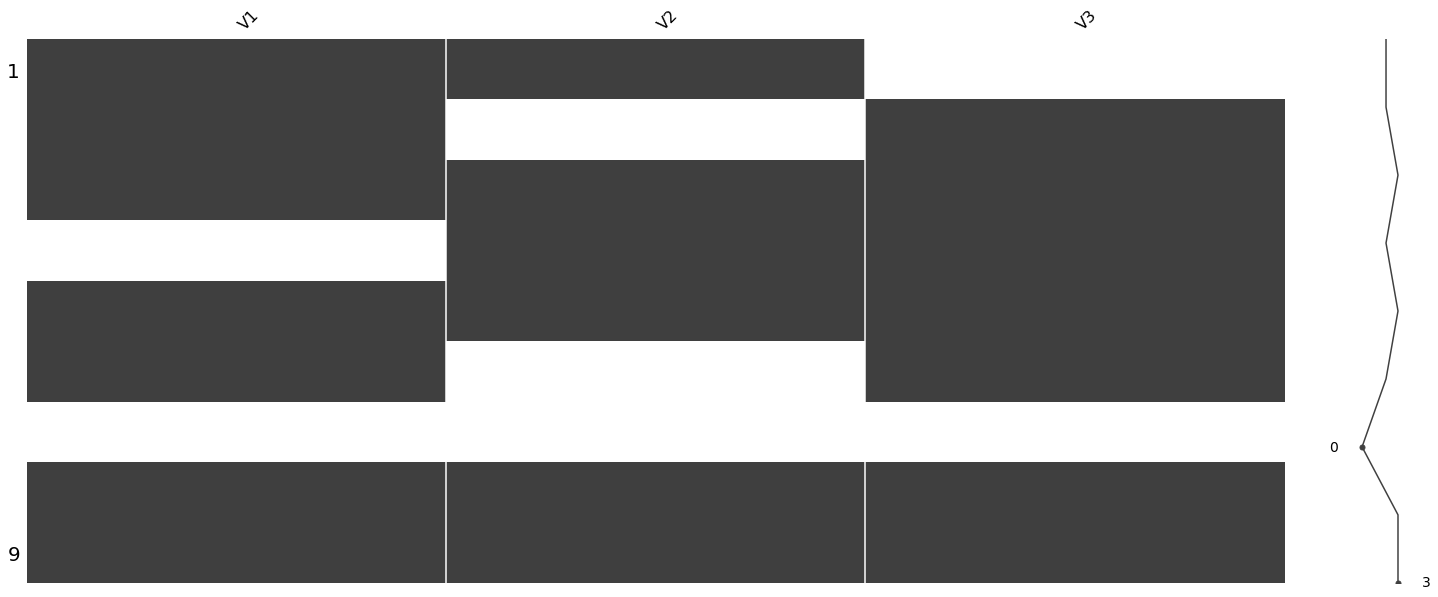

In [67]:
msno.matrix(df);

### Büyük Veride Grafikler

In [69]:
import seaborn as sns
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [71]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

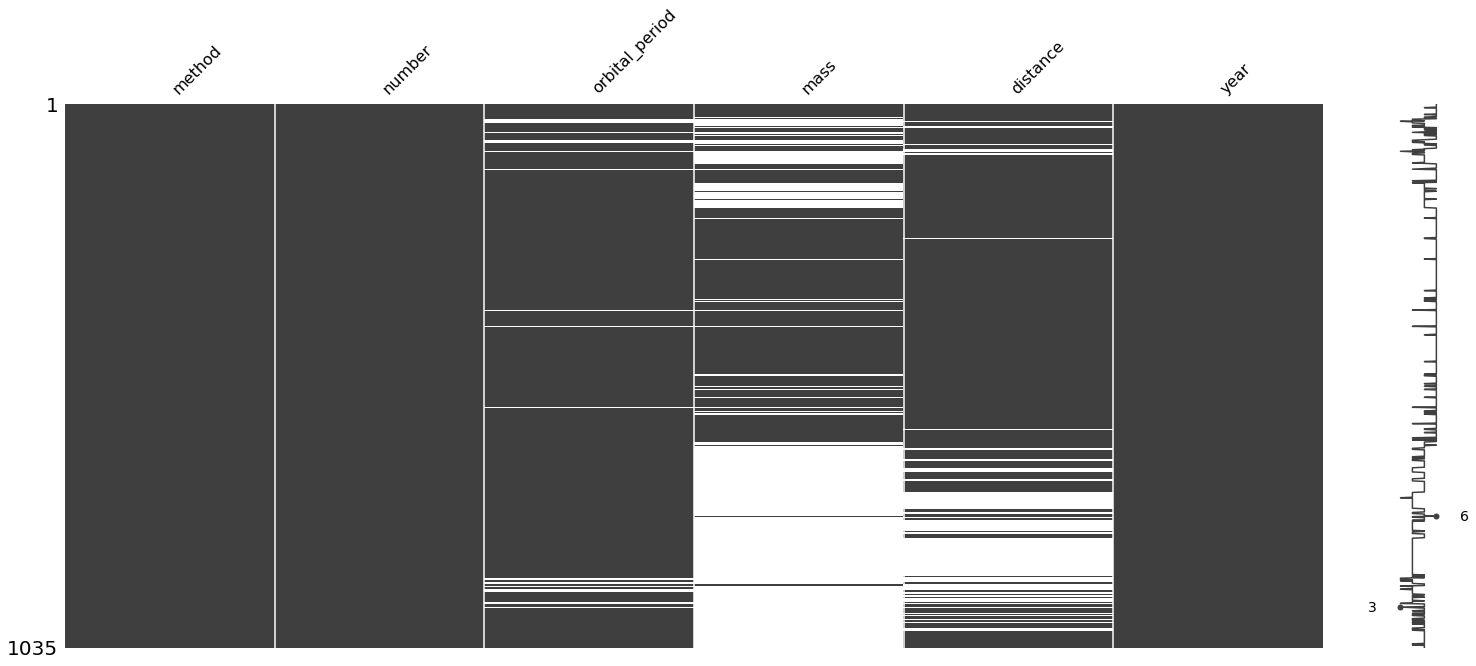

In [73]:
msno.matrix(df);

### Ne Gözlemledik?
* ***orbital_period değişkeninde eksiklik*** olduğunda ***mass'da da eksiklik*** oluyor. Bu sebeple ***mass orbital_period'a bağımlı*** yorumu yapabiliriz
* ***mass ile distance*** arasında pek bir bağımlılık olmasa da ***son gözlemlerde*** sürekli birlikte eksiklik gözlemlenmiş. ***Bağımlılık olabilir***.

### Heatmap (Nullity-Correlation) [Eksiklik-İlişki Isı Haritası]
* karşılıkli iki değişken arasında birlikte eksiklik analizi yapan bir ısı haritasıdır.
* 0-1 arasında değer alır. 1.0 ise çok yüksek ilişki yorumu yapılır. 

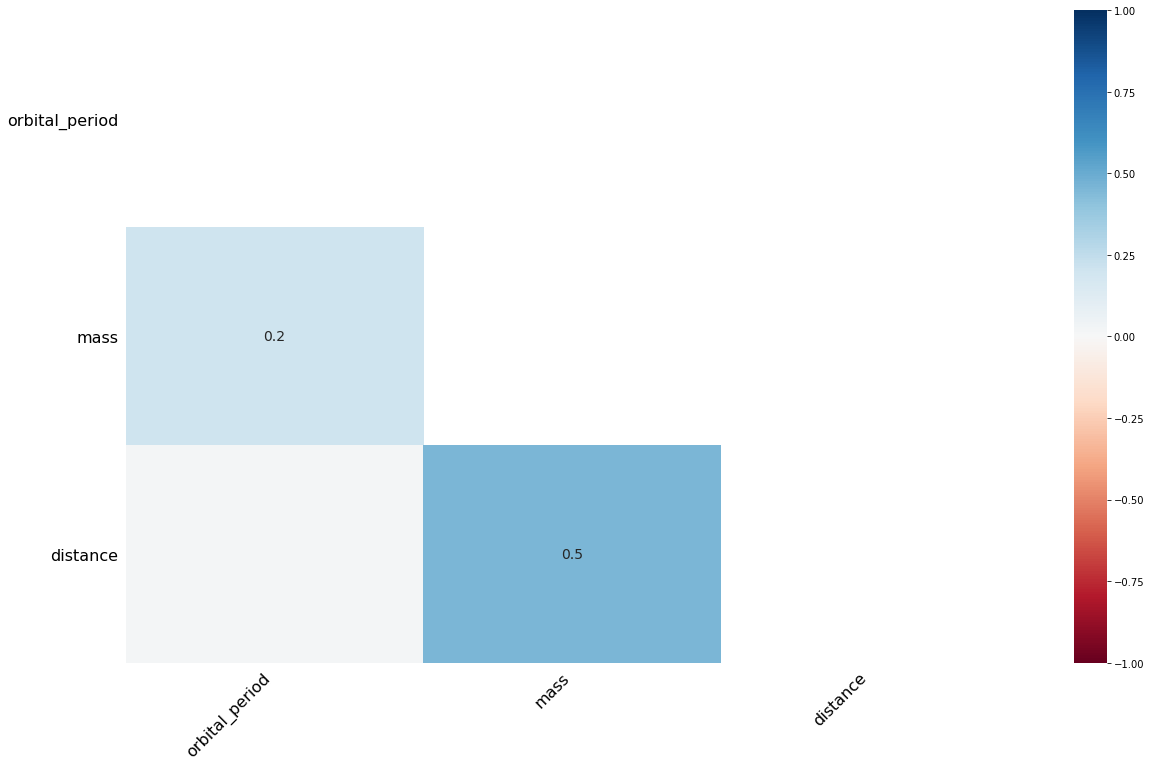

In [74]:
msno.heatmap(df);

### Görsel-Analiz Sonuç
* ***mass-orbital_period*** arasında matrix ile bir bağımlılık keşfettik.
* ***mass-distance*** arasında heatmap ile 50% değerinde bir bağımlılık keşfettik.
* Oluşan ***eksikliklerin büyük çoğunluğu bağımlılıktan*** oluştuğunu söyleyebiliriz.
* Rastsal bir durum çok az olduğundan eksik veri işlemlerinde ***direkt-silme direkt-doldurma yapılması mantıklı değildir.***
* Eksikliklerden kaynaklı çeşitli kişilerden yorum alınabilir.

### Silme Yöntemleri

In [75]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [77]:
# en az 1 eksik değer varsa sil
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [78]:
# tüm gözlemler eksik ise sil
df.dropna(how='all')

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [80]:
# eksiklik olan columnları sil - hepsinde var o yüzden hepsi silinecek
df.dropna(axis=1)

""
0
1
2
3
4
5
6
7
8


In [82]:
# tüm değerleri Na olan değişkeni sil
df.dropna(axis=1,how='all')

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Değer Atama Yöntemleri

In [83]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Sayısal Değişkenlerde atama

In [85]:
df.V1.fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [86]:
df.V1.fillna(df.V1.mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [89]:
# tüm değişkenler için 1.yol
df.apply(lambda x : x.fillna(x.mean()), axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [90]:
# ikinci yol

In [92]:
df.fillna(df.mean())

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [96]:
# üçüncü yol 

In [98]:
df.where(pd.notna(df),df.mean(),axis='columns')

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [93]:
# değişkenlerden V1 - V2 normal dağılım ile dağılmış olsun => ortalama ile doldurmalıyız.
# V3 ise çarpık dağılıma sahip olsun. => medyan ile doldurmalıyız.

In [94]:
df.fillna(df.mean()['V1':'V2'])

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [99]:
df.V3.fillna(df.V3.median())

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

## Kategorik Değişken Kırılımında Değer Atama

Eğer verisetimizdeki eksikliği doldurmak istiyorsak ortalama ile doldurabiliriz <br>
Fakat Kategorik değişkenlerin olduğu ve belirli bir gruplamanın olduğu veri setlerinde o gruplar özeline <br>
indirgeyip o grubun ortalaması ile doldurmak daha mantıklı olacaktır. <br>

### Örnek Senaryo
personel verisetimiz olsun (***personel-departman-maaş***). Bu verisetindeki bazı gözlemlerde ***maaş eksik*** olsun.  <br>
Verisetinin ***genel ortalaması*** ile doldurmak ***mantıklı olmayabilir***. Personelleri ***departmanlarına göre <br>
ayıklayıp*** bu departmanların ortalamaları üzerinden doldurma yapmak daha mantıklı olacaktır. <br>

Hatta ***uzmanlığa göre de ayıklama*** yapılıp ortalama indirgenebilir. <br>

In [101]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [105]:
# departmanlara göre maaş ort
df.groupby('departman')['maas'].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [106]:
df.maas

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: maas, dtype: float64

In [108]:
# departmanlara göre maas ort atama
df['maas'].fillna(df.groupby('departman')['maas'].transform('mean'))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

## Kategorik Değişkenler için Eksik Değer Atama

In [110]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4}        
)

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


### Yapılabilecek Şeyler
* mod alıp ***mod değeri*** ile doldurma
* önceki veya sonraki değer ile doldurma

In [113]:
# mod değeri ile doldurma
df['departman'].fillna(df.departman.mode()[0])

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [114]:
# önceki değer ile doldurma
df.departman.fillna(method='bfill')

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [116]:
# sonraki değer ile doldurma
df.departman.fillna(method='ffill')

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

## Tahmine Dayalı Değeri Atama Yöntemleri

In [163]:
import seaborn as sns
import missingno as msno

df = sns.load_dataset('titanic')
df = df.select_dtypes(include=['float64','int64'])

print(df.head())
print(df.isnull().sum())

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500
survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64


### KNN Algorithm (En Yakın Komşu Algoritması) 

In [164]:
from ycimpute.imputer import knnimput

In [165]:
var_names = df.columns # knn verileri array olarak istediğinden işlemden sonra tekrar columns lara ihtiyacımız olacak
var_names

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [166]:
import numpy as np
n_df = np.array(df) # gözlemleri array'e çevirdik

In [167]:
n_df[:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [168]:
n_df.shape

(891, 6)

In [169]:
dff = knnimput.KNN(k=4).complete(n_df) # k => komşu sayısı | machine learning algorithm

Imputing row 1/891 with 0 missing, elapsed time: 0.113
Imputing row 101/891 with 0 missing, elapsed time: 0.114
Imputing row 201/891 with 0 missing, elapsed time: 0.115
Imputing row 301/891 with 1 missing, elapsed time: 0.116
Imputing row 401/891 with 0 missing, elapsed time: 0.117
Imputing row 501/891 with 0 missing, elapsed time: 0.118
Imputing row 601/891 with 0 missing, elapsed time: 0.120
Imputing row 701/891 with 0 missing, elapsed time: 0.121
Imputing row 801/891 with 0 missing, elapsed time: 0.122


In [152]:
type(dff)

numpy.ndarray

In [153]:
import pandas as pd
dff = pd.DataFrame(dff,columns=var_names)

In [155]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

### Random Forest 

In [156]:
import seaborn as sns
import missingno as msno

df = sns.load_dataset('titanic')
df = df.select_dtypes(include=['float64','int64'])

In [157]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [172]:
var_names = df.columns 

In [159]:
import numpy as np
n_df = np.array(df)

In [162]:
from ycimpute.imputer import iterforest

dff = iterforest.IterImput().complete(n_df) # Random Forest algoritması ile doldurma işlemi

In [170]:
dff = pd.DataFrame(dff,columns=var_names)

In [171]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

### EM Algoritması

In [173]:
import seaborn as sns
import missingno as msno

df = sns.load_dataset('titanic')
df = df.select_dtypes(include=['float64','int64'])

In [174]:
var_names = df.columns # knn verileri array olarak istediğinden işlemden sonra tekrar columns lara ihtiyacımız olacak
var_names

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [175]:
import numpy as np
n_df = np.array(df) # gözlemleri array'e çevirdik

In [176]:
from ycimpute.imputer import EM

In [177]:
dff = EM().complete(n_df)

In [178]:
dff = pd.DataFrame(dff,columns=var_names)

In [179]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

## Değişken Standardizasyonu (Veri Standardizasyonu)
Standardizasyon ile Transform birbiriyle karıştırılabilir. Fakat farklı şeylerdir.

***Standardizasyon*** bir değişkenin değerlerini ***0-1*** gibi küçük aralıklara sokar fakat, değerlerin sıralamasını oranlamalarını değiştirmez. <br>
* ***standart sapma - ort - medyan*** değerleri ***değişir***.
* ***yoğunluk - dağılım*** gibi değerler ***değişmez***.

***Transform*** ise direkt değişkenin yapısını değiştirir. Örn <br>
* ***cinsiyet*** kategorik değişkeni ***0,1*** (numerik kategorik) dizilimine çevirmek.

In [184]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


### Standardizasyon
değerleri -3,+3 arasına sıkıştırır dönüştürür <br>
***Machine Learning için Önemli***

In [182]:
from sklearn import preprocessing

In [188]:
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

### Normalizasyon
değerleri 0,1 arasında sıkıştırır.

In [189]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

### Min-Max Dönüşümü
bizim ayarladığımız farklı 2 değer arasına sıkıştırır

In [191]:
scaler = preprocessing.MinMaxScaler(feature_range=(10,20))

In [192]:
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

## Değişken Dönüşümleri
verilerin yapısını bozan dönüşümlerdir

In [199]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 0-1 Dönüşümü
***ML fonksiyonları*** yapısı gereği ***kategorik değişken*** yerine ***numerik değişken*** istiyorlar. Bu sebep ile kategorik değişkenleri dönüştürmemiz gerek.

In [195]:
from sklearn.preprocessing import LabelEncoder

lbe  = LabelEncoder()

In [200]:
df['sex_numeric'] = lbe.fit_transform(df['sex'])

In [202]:
# hangisine 1 hangisine 0 verdiğini kontrol etmemiz lazım.

In [203]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_numeric
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


### 1 ve Diğerleri (0) Dönüşümü
bizim için önemli olan kategorik değere 1 diyip geri kalan değerlere 0 deme yöntemidir.

In [204]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_numeric
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [207]:
# sağlayanlara 1 sağlamayanlara 0
df['new_day'] = np.where(df['day'].str.contains('Sun'), 1 , 0) 

In [206]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_numeric,new_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


### Çok Sınıflı Dönüşüm

In [208]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [210]:
lbe.fit_transform(df['day'])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

### Dikkat - Önemli Not
nominal kategorik değişkenleri numerik değişkenlere çevirdiğimizde 0-10 gibi aralıklarda yer alır. <br>
Bu durumda ML Algoritmaları ***0 değerinin 10 değerinden daha küçük görüp modelimizi bozacaktır.*** <br>

Sonuç olarak ***nominal değişkenleri numerik hale getirdiğimizde algoritmaların kafası karışmaktadır.*** <br>

### One-Hot Dönüşümü ve Dummy Değişken Tuzağı

In [211]:
df_one_hot = pd.get_dummies(df, columns=['sex'], prefix=['sex'])

In [ ]:
# görüldüğü üzere kategorik değişkenin değerleri kadar yeni değişkenler(column) oluştu

In [213]:
df_one_hot.head()

,total_bill,tip,smoker,day,time,size,sex_numeric,new_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,0,1


### Dummy Değişken Tuzağı Nedir?
görüldüğü üzere yeni veri-setinde sex_MALE ve sex_Female adında 2 yeni değişkenimiz oluştu. <br>
Fakat bu iki değişken aynı bilgiyi taşımakta.
### ***Bu durum Sadece 2 class'ı olan kategorik değişkenler içindir.***
### Peki nasıl Çözülür ?
2 classı olan bir değişkende sadece bir değişken üzerinden olup olmama durumunu ML Algoritmaları algılayabilir. <br>
Yani yapacağımız şey sadece bir değişken oluşturmak.

In [218]:
# 2'den fazla class var ise sıkıntı oluşmaz.
pd.get_dummies(df,columns=['day'],prefix=['day']) 

,total_bill,tip,sex,smoker,time,size,sex_numeric,new_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,1,0,0,0,1,0
240,27.18,2.00,Female,Yes,Dinner,2,0,0,0,0,1,0
241,22.67,2.00,Male,Yes,Dinner,2,1,0,0,0,1,0
242,17.82,1.75,Male,No,Dinner,2,1,0,0,0,1,0


### Sürekli Değişkenki Kategorik Değişkene Çevirme

In [226]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [219]:
from sklearn.preprocessing import KBinsDiscretizer

In [228]:
dff = df.select_dtypes(include=['int64','float64'])
dff.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [231]:
est = KBinsDiscretizer(n_bins=(3,2,2) , encode='ordinal',strategy='quantile').fit(dff)

In [232]:
est.transform(dff)[:10]

array([[1., 0., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.]])

### Değişkeni İndexe, İndexi Değişkene Çevirmek

In [233]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [234]:
df['new_var'] = df.index

In [236]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,new_var
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,2
3,23.68,3.31,Male,No,Sun,Dinner,2,3
4,24.59,3.61,Female,No,Sun,Dinner,4,4


In [237]:
df.new_var = df.new_var + 10

In [238]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,new_var
0,16.99,1.01,Female,No,Sun,Dinner,2,10
1,10.34,1.66,Male,No,Sun,Dinner,3,11
2,21.01,3.50,Male,No,Sun,Dinner,3,12
3,23.68,3.31,Male,No,Sun,Dinner,2,13
4,24.59,3.61,Female,No,Sun,Dinner,4,14


In [239]:
df.index = df['new_var']

In [240]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,new_var
new_var,,,,,,,,
10,16.99,1.01,Female,No,Sun,Dinner,2,10
11,10.34,1.66,Male,No,Sun,Dinner,3,11
12,21.01,3.50,Male,No,Sun,Dinner,3,12
13,23.68,3.31,Male,No,Sun,Dinner,2,13
14,24.59,3.61,Female,No,Sun,Dinner,4,14
